In [1]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           1.3.0
altair                            4.2.0
anyio                             3.6.2
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
astroid                           2.11.7
asttokens                         2.0.8
astunparse                        1.6.3
attrs                             22.1.0
autopep8                          1.6.0
Babel                             2.10.3
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            5.0.1
blinker                           1.5
branca                            0.5.0
cachetools                        5.2.0
certifi                           2022.9.24
cffi                              1.15.1
charset-normalizer                2.1.1
click                             8.1.3
cloudpickle                       2.2.0
colorama              

In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

2024-03-09 14:42:00.779930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 14:42:01.163960: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 14:42:01.202945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mathildaweston/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../

In [4]:
tf.config.list_physical_devices('GPU')

2024-03-09 14:42:04.131331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mathildaweston/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-09 14:42:04.131552: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 14:42:04.131626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-12451Q9): /proc/driver/nvidia/version does not exist


[]

In [5]:
import gdown

In [6]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.usercontent.google.com/download?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=cb728d48-3c9f-412e-8604-3534fca20837
To: /home/mathildaweston/code/girishgautam/lip_translate/data.zip
100%|████████████████████████████████████████████████████████████████████████████████| 423M/423M [00:48<00:00, 8.74MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [7]:
def load_video(path:str) -> List[float]: #Returns a list of the normalized, greyscaled frames of the video of shape=(75, 46, 140, 1)

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:]) #There is a better way of doing this
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [8]:
eg_vid = load_video('data/s1/bbaf2n.mpg')

2024-03-09 14:42:57.574149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
eg_vid.shape

TensorShape([75, 46, 140, 1])

In [10]:
path = 'data/s1/bbaf2n.mpg'


In [11]:
orig_cap = cv2.VideoCapture('data/s1/bbaf2n.mpg')

In [12]:
orig_cap.get(cv2.CAP_PROP_FRAME_COUNT)

75.0

In [13]:
orig_cap.read(cv2.CAP_PROP_FRAME_COUNT)[1].shape

(288, 360, 3)

In [14]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [15]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)


In [16]:
# char_to_num(['n','i','c','k'])
num_to_char([14,  9,  3, 11])[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'n'>

In [17]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
        print(lines)
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': #Removing the silences
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [25]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
#     file_name = path.split('/')[-1].split('.')[0]
#     File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [19]:
test_path = '.\\data\\s1\\bbal6n.mpg'

file_name = test_path.split('\\')[-1].split('.')[0]
alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')

alignment_path, file_name

('data/alignments/s1/bbal6n.align', 'bbal6n')

In [20]:
# tf.convert_to_tensor(test_path)

In [21]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8')#.split('\\')[-1].split('.')[0]

'.\\data\\s1\\bbal6n.mpg'

In [22]:
 with open(alignment_path, 'r') as f:
        lines = f.readlines() 
        print(lines)

['0 16000 sil\n', '16000 21250 bin\n', '21250 26750 blue\n', '26750 27750 at\n', '27750 31500 l\n', '31500 39250 six\n', '39250 45250 now\n', '45250 74500 sil\n']


### Testing we get an image

In [26]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

['0 16000 sil\n', '16000 21250 bin\n', '21250 26750 blue\n', '26750 27750 at\n', '27750 31500 l\n', '31500 39250 six\n', '39250 45250 now\n', '45250 74500 sil\n']


In [28]:
frames
# alignments

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.19734782],
         [ 0.07893913]],

        [[ 1.4603739 ],
         [ 1.4603739 ],
         [ 1.4209043 ],
         ...,
         [ 0.15787826],
         [ 0.07893913],
         [ 0.03946957]],

        [[ 1.4209043 ],
         [ 1.4209043 ],
         [ 1.3814348 ],
         ...,
         [ 0.07893913],
         [ 0.07893913],
         [ 0.07893913]],

        ...,

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.94633   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.94726956],
         [ 0.94726956],
         [ 0.94726956],
         ...,
         [ 9.90686   ],
         [ 9.86739

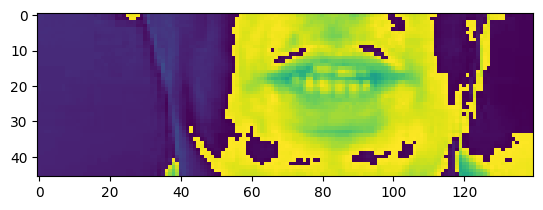

In [29]:
plt.imshow(frames[40])

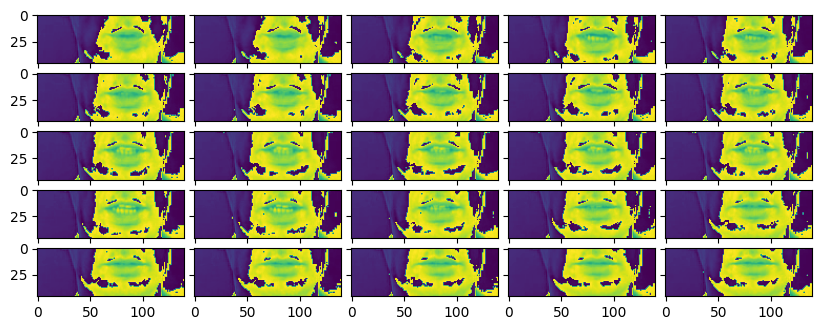

In [30]:
from mpl_toolkits.axes_grid1 import ImageGrid

eg_frames = []
for i in range(25,50):
    eg_frames.append(frames[i])

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [frame for frame in eg_frames]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [ ]:
bytes.decode(num_to_char(alignments.numpy()).numpy()[0])

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

In [ ]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [ ]:
# def lambda_func(file_path):
#     lambda file_path: file_path
#     return file_path

# lambda_func('./data/s1')

In [ ]:
# def mappable_id_function(path:str) ->List[str]:
#     result = tf.py_function(lambda file_path: file_path, [path], (tf.float32, tf.int64))
#     return result

In [ ]:
mappable_function(test_path)

In [ ]:
# mappable_id_function(test_path)

### Create Data Pipeline


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg') #Rerout to processed data
data = data.shuffle(500, reshuffle_each_iteration=False)#Take more than 500?
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [ ]:
# data_2 = tf.data.Dataset.list_files('./data/s1/*.mpg')
# data_2 = data_2.shuffle(500, reshuffle_each_iteration=False) 
# data_2 = data_2.map(mappable_function)
# data_2.element_spec

In [ ]:
type(train)

In [ ]:
# frames, alignments = data.as_numpy_iterator().next()

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

In [ ]:
type(data.as_numpy_iterator().next()[0][0])

### Skeleton get_data function

In [ ]:
def get_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    frames = video_dict[file_name]
    alignments = align_dict[file_name]
    
    return frames, alignments  #Returned as ndarrays

In [ ]:
def new_mappable_function(path:str) ->List[str]:
    result = tf.py_function(get_data, [path], (tf.float32, tf.int64))
    return result

### Test with one or two videos

In [ ]:
f = open('process2.json')

video_dict = json.load(f)

In [ ]:
path_to_align = 'data/processed_alignments/s1/s1_proc_align.json'

In [ ]:
f = open(path_to_align)

align_dict = json.load(f)

In [ ]:
test_keys = video_dict.keys()
test_keys

In [ ]:
first_frame = test_vids['bbbmzn'][0]

In [ ]:
len(first_frame)

In [ ]:
# data = tf.data.Dataset.list_files('./data/s1/*.mpg')
# data = data.shuffle(500, reshuffle_each_iteration=False)
# data = data.map(new_mappable_function)
# data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
# data = data.prefetch(tf.data.AUTOTUNE)
# # Added for split 
# train = data.take(450)
# test = data.skip(450)

In [ ]:
# train

In [ ]:
get_data(tf.convert_to_tensor('./data/s1/bbbmzn.mpg'))



### Using from_tensor_slices

In [ ]:
for key in test_keys:
    print(key)
    video_dict[key] = tf.convert_to_tensor(video_dict[key], dtype= tf.float32)
    align_dict[key] = tf.convert_to_tensor(align_dict[key], dtype= tf.float32)

In [ ]:
align_dict_test = {key: align_dict[key] for key in test_keys}

In [ ]:
len(list(video_dict.values()))

In [ ]:
data = tf.data.Dataset.from_tensor_slices([list(video_dict.values()), list(align_dict.values())])
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [ ]:
train.get_single_element()